# ¿Que empleadosse van a ir?

### CARGA DE LIBRERIAS

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### CARGA DE LOS DATOS

In [7]:
df = pd.read_csv('AbandonoEmpleados.csv', sep = ';', index_col= 'id', na_values='#N/D')

In [8]:
df

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,empleados,satisfaccion_entorno,sexo,...,satisfaccion_companeros,horas_quincena,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,conciliacion,anos_compania,anos_en_puesto,anos_desde_ult_promocion,anos_con_manager_actual
id,,,,,,,,,,,,,,,,,,,,,
1,41,Yes,Travel_Rarely,Sales,1,Universitaria,Life Sciences,1,Media,3.0,...,Baja,80,0,8,0,NaN,6,NaN,0,5
2,49,No,Travel_Frequently,Research & Development,8,Secundaria,Life Sciences,1,Alta,2.0,...,Muy_Alta,80,1,10,3,NaN,10,NaN,1,7
4,37,Yes,Travel_Rarely,Research & Development,2,Secundaria,Other,1,Muy_Alta,2.0,...,Media,80,0,7,3,NaN,0,2.0,0,0
5,33,No,Travel_Frequently,Research & Development,3,Universitaria,Life Sciences,1,Muy_Alta,3.0,...,Alta,80,0,8,3,NaN,8,3.0,3,0
7,27,No,Travel_Rarely,Research & Development,2,Universitaria,Medical,1,Baja,3.0,...,Muy_Alta,80,1,6,3,NaN,2,NaN,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,No,Travel_Frequently,Research & Development,23,Master,Medical,1,Alta,4.0,...,Alta,80,1,17,3,NaN,5,4.0,0,3
2062,39,No,Travel_Rarely,Research & Development,6,Secundaria,Medical,1,Muy_Alta,2.0,...,Baja,80,1,9,5,NaN,7,NaN,1,7
2064,27,No,Travel_Rarely,Research & Development,4,Master,Life Sciences,1,Media,4.0,...,Media,80,1,6,0,NaN,6,NaN,0,3


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1470 entries, 1 to 2068
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   edad                      1470 non-null   int64  
 1   abandono                  1470 non-null   object 
 2   viajes                    1470 non-null   object 
 3   departamento              1470 non-null   object 
 4   distancia_casa            1470 non-null   int64  
 5   educacion                 1369 non-null   object 
 6   carrera                   1470 non-null   object 
 7   empleados                 1470 non-null   int64  
 8   satisfaccion_entorno      1470 non-null   object 
 9   sexo                      1271 non-null   float64
 10  implicacion               1452 non-null   object 
 11  nivel_laboral             1470 non-null   int64  
 12  puesto                    1470 non-null   object 
 13  satisfaccion_trabajo      1394 non-null   object 
 14  estado_civil 

#### ANÁLISIS DE NULOS

In [10]:
df.isna().sum().sort_values(ascending = False)

anos_en_puesto              1238
conciliacion                1011
sexo                         199
educacion                    101
satisfaccion_trabajo          76
implicacion                   18
viajes                         0
carrera                        0
distancia_casa                 0
departamento                   0
satisfaccion_entorno           0
empleados                      0
nivel_laboral                  0
abandono                       0
edad                           0
estado_civil                   0
puesto                         0
salario_mes                    0
num_empresas_anteriores        0
incremento_salario_porc        0
evaluacion                     0
mayor_edad                     0
horas_extra                    0
horas_quincena                 0
satisfaccion_companeros        0
anos_experiencia               0
nivel_acciones                 0
num_formaciones_ult_ano        0
anos_compania                  0
anos_desde_ult_promocion       0
anos_con_m

Conclusiones:

* anos_en_puesto y conciliacion tienen demasiados nulos --> eliminar Variables
* sexo, educacion, satisfaccion_trabajo e implicacion --> imputarlos tras EDA


In [11]:
df.drop(columns = ['anos_en_puesto','conciliacion'], inplace = True)
df

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,empleados,satisfaccion_entorno,sexo,...,incremento_salario_porc,evaluacion,satisfaccion_companeros,horas_quincena,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual
id,,,,,,,,,,,,,,,,,,,,,
1,41,Yes,Travel_Rarely,Sales,1,Universitaria,Life Sciences,1,Media,3.0,...,11,Alta,Baja,80,0,8,0,6,0,5
2,49,No,Travel_Frequently,Research & Development,8,Secundaria,Life Sciences,1,Alta,2.0,...,23,Muy_Alta,Muy_Alta,80,1,10,3,10,1,7
4,37,Yes,Travel_Rarely,Research & Development,2,Secundaria,Other,1,Muy_Alta,2.0,...,15,Alta,Media,80,0,7,3,0,0,0
5,33,No,Travel_Frequently,Research & Development,3,Universitaria,Life Sciences,1,Muy_Alta,3.0,...,11,Alta,Alta,80,0,8,3,8,3,0
7,27,No,Travel_Rarely,Research & Development,2,Universitaria,Medical,1,Baja,3.0,...,12,Alta,Muy_Alta,80,1,6,3,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,No,Travel_Frequently,Research & Development,23,Master,Medical,1,Alta,4.0,...,17,Alta,Alta,80,1,17,3,5,0,3
2062,39,No,Travel_Rarely,Research & Development,6,Secundaria,Medical,1,Muy_Alta,2.0,...,15,Alta,Baja,80,1,9,5,7,1,7
2064,27,No,Travel_Rarely,Research & Development,4,Master,Life Sciences,1,Media,4.0,...,20,Muy_Alta,Media,80,1,6,0,6,0,3


#### EDA VARIABLES CATEGÓRICAS

In [12]:
def graficos_eda_categoricos(cat):
    
    #Calculamos el número de filas que necesitamos
    from math import ceil
    filas = ceil(cat.shape[1] / 2)

    #Definimos el gráfico
    f, ax = plt.subplots(nrows = filas, ncols = 2, figsize = (16, filas * 6))

    #Aplanamos para iterar por el gráfico como si fuera de 1 dimensión en lugar de 2
    ax = ax.flat 

    #Creamos el bucle que va añadiendo gráficos
    for cada, variable in enumerate(cat):
        cat[variable].value_counts().plot.barh(ax = ax[cada])
        ax[cada].set_title(variable, fontsize = 12, fontweight = "bold")
        ax[cada].tick_params(labelsize = 12)

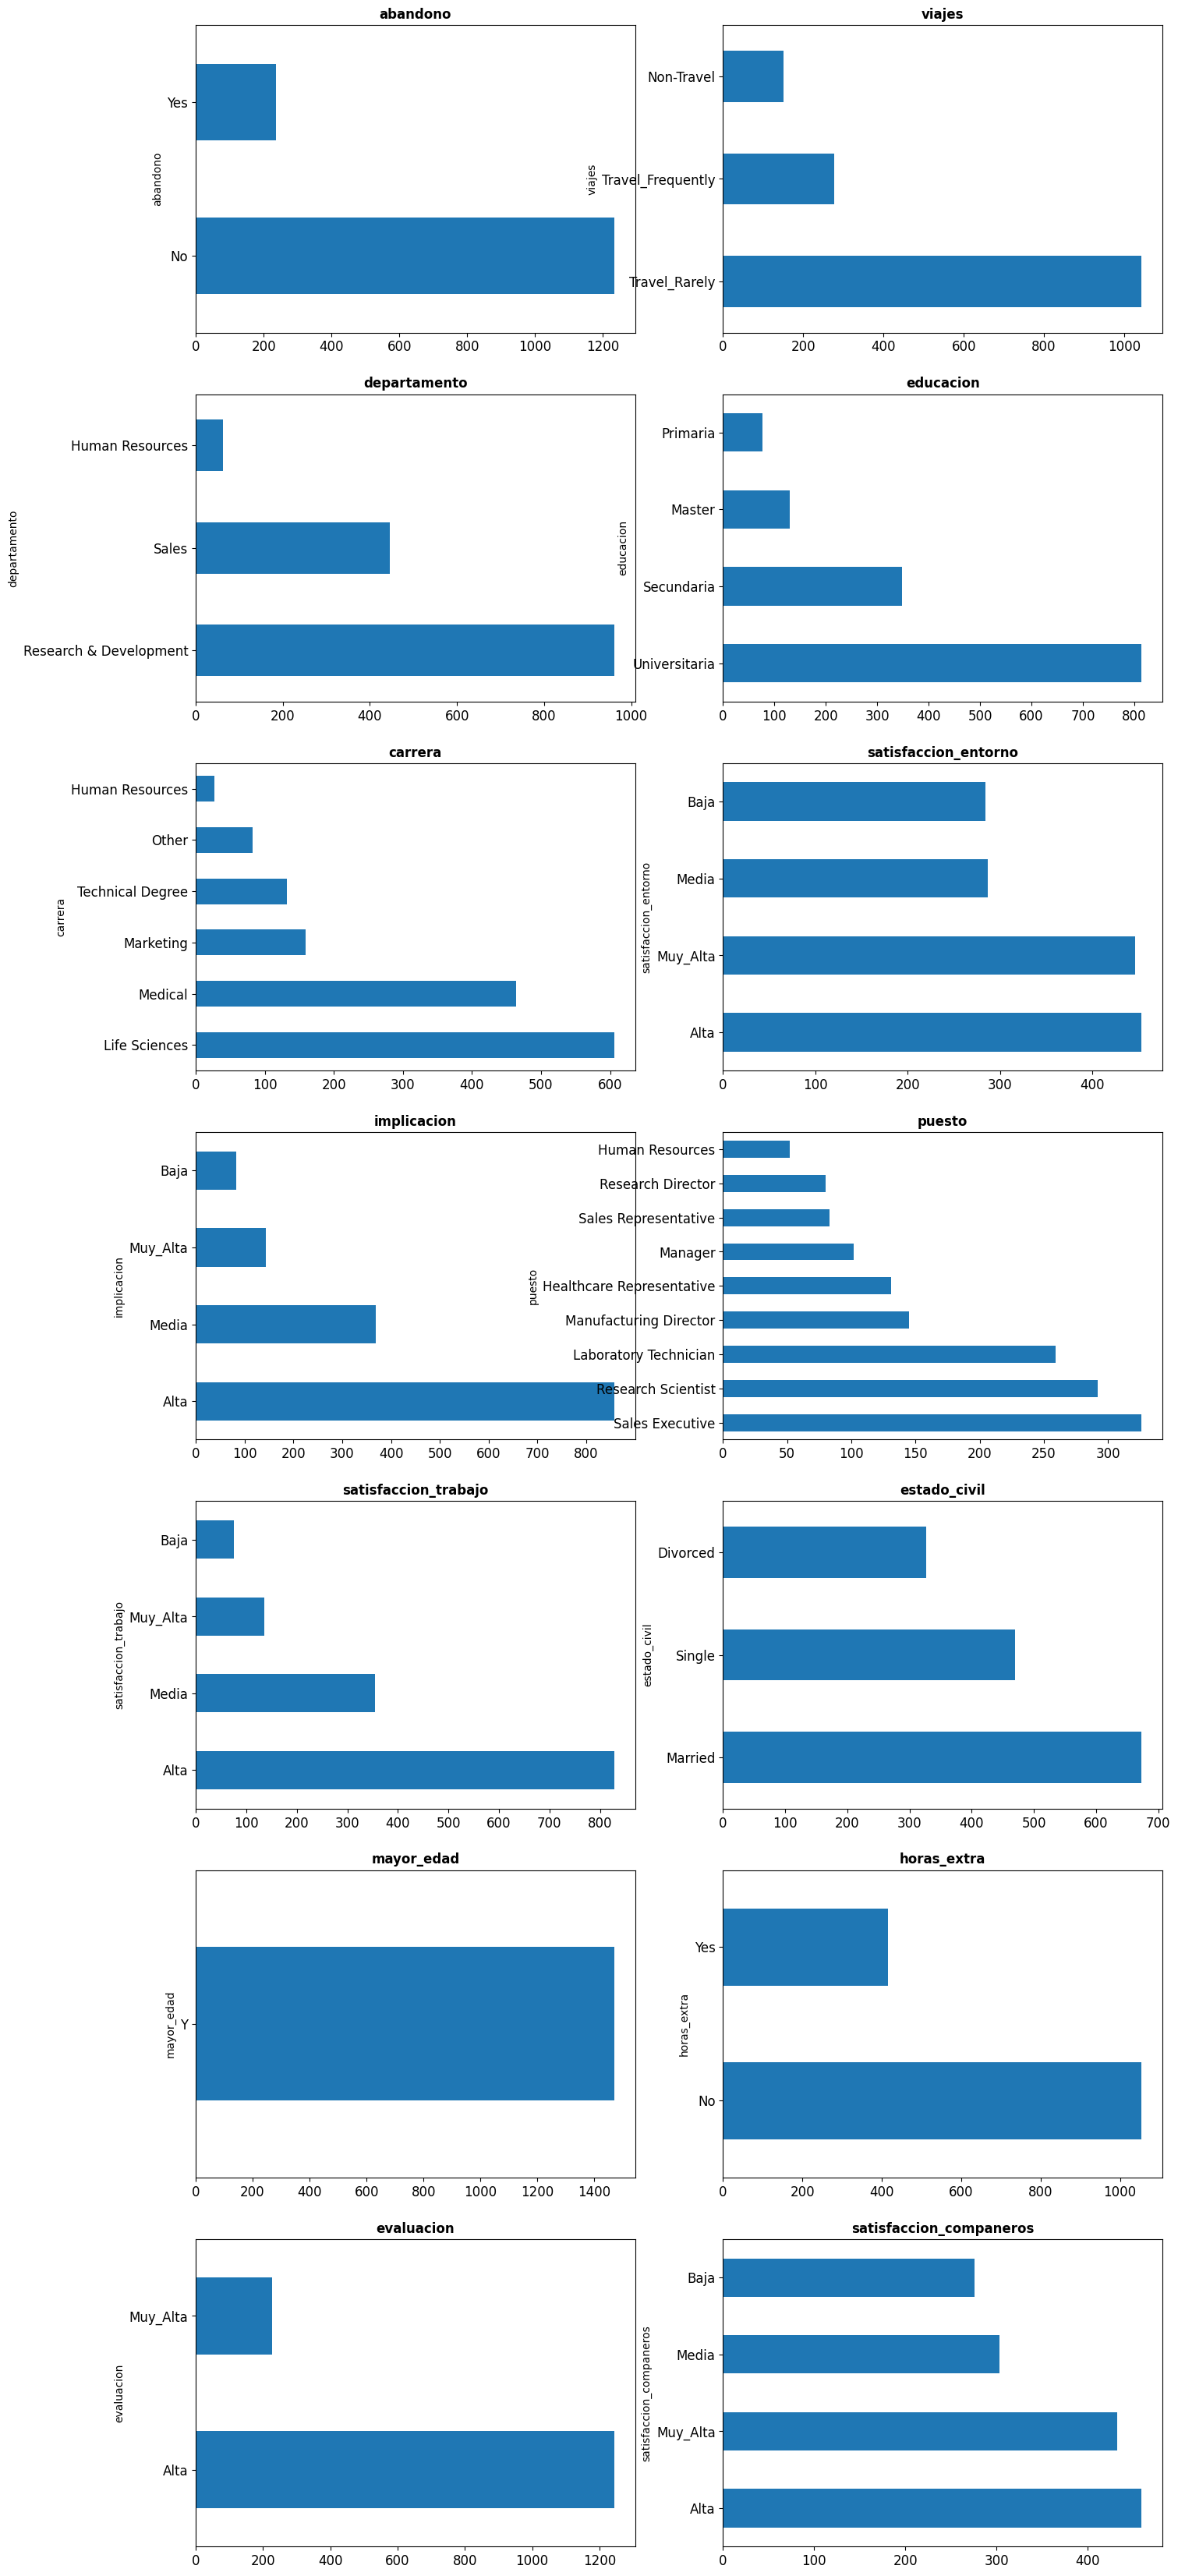

In [13]:
graficos_eda_categoricos(df.select_dtypes('O'))

Conclusiones:

* mayor_edad solo tiene un valor --> eliminarla
* Sobre las imputaciones pendientes de variables categóricas:
  * educacion: imputar por 'Universitaria'
  * satisfaccion_trabajo: imputar por 'Alta'
  * implicacion: imputar por 'Alta'

In [14]:
df.drop(columns = 'mayor_edad', inplace = True)

df['educacion'] = df['educacion'].fillna('Universitaria')

df['satisfaccion_trabajo'] = df['satisfaccion_trabajo'].fillna('Alta')

df['implicacion'] = df['implicacion'].fillna('Alta')

#### EDA VARIABLES NUMÉRICAS

In [15]:
def estadisticos_cont(num):
    #Calculamos describe
    estadisticos = num.describe().T
    #Añadimos la mediana
    estadisticos['median'] = num.median()
    #Reordenamos para que la mediana esté al lado de la media
    estadisticos = estadisticos.iloc[:,[0,1,8,2,3,4,5,6,7]]
    #Lo devolvemos
    return(estadisticos)

In [16]:
estadisticos_cont(df.select_dtypes('number'))

,count,mean,median,std,min,25%,50%,75%,max
edad,1470.0,36.923810,36.0,9.135373,18.0,30.0,36.0,43.0,60.0
distancia_casa,1470.0,9.192517,7.0,8.106864,1.0,2.0,7.0,14.0,29.0
empleados,1470.0,1.000000,1.0,0.000000,1.0,1.0,1.0,1.0,1.0
sexo,1271.0,2.727773,3.0,0.720788,1.0,2.0,3.0,3.0,4.0
nivel_laboral,1470.0,2.063946,2.0,1.106940,1.0,1.0,2.0,3.0,5.0
salario_mes,1470.0,6502.931293,4919.0,4707.956783,1009.0,2911.0,4919.0,8379.0,19999.0
num_empresas_anteriores,1470.0,2.693197,2.0,2.498009,0.0,1.0,2.0,4.0,9.0
incremento_salario_porc,1470.0,15.209524,14.0,3.659938,11.0,12.0,14.0,18.0,25.0
horas_quincena,1470.0,80.000000,80.0,0.000000,80.0,80.0,80.0,80.0,80.0
nivel_acciones,1470.0,0.793878,1.0,0.852077,0.0,0.0,1.0,1.0,3.0


Conclusiones:

* Empleados solo tiene un valor --> Eliminarla
* Sexo tiene 4 valores --> Eliminarla
* Horas quincena solo tiene una valor --> Eliminarla
* De los nulos pendientes de imputación que sean numéricas solo está el sexo, pero como la vamos a eliminar ya no hay que imputar nada


In [17]:
df.drop(columns = ['empleados','sexo','horas_quincena'], inplace = True)
df

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,satisfaccion_entorno,implicacion,nivel_laboral,...,horas_extra,incremento_salario_porc,evaluacion,satisfaccion_companeros,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual
id,,,,,,,,,,,,,,,,,,,,,
1,41,Yes,Travel_Rarely,Sales,1,Universitaria,Life Sciences,Media,Alta,2,...,Yes,11,Alta,Baja,0,8,0,6,0,5
2,49,No,Travel_Frequently,Research & Development,8,Secundaria,Life Sciences,Alta,Media,2,...,No,23,Muy_Alta,Muy_Alta,1,10,3,10,1,7
4,37,Yes,Travel_Rarely,Research & Development,2,Secundaria,Other,Muy_Alta,Media,1,...,Yes,15,Alta,Media,0,7,3,0,0,0
5,33,No,Travel_Frequently,Research & Development,3,Universitaria,Life Sciences,Muy_Alta,Alta,1,...,Yes,11,Alta,Alta,0,8,3,8,3,0
7,27,No,Travel_Rarely,Research & Development,2,Universitaria,Medical,Baja,Alta,1,...,No,12,Alta,Muy_Alta,1,6,3,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,No,Travel_Frequently,Research & Development,23,Master,Medical,Alta,Muy_Alta,2,...,No,17,Alta,Alta,1,17,3,5,0,3
2062,39,No,Travel_Rarely,Research & Development,6,Secundaria,Medical,Muy_Alta,Media,3,...,No,15,Alta,Baja,1,9,5,7,1,7
2064,27,No,Travel_Rarely,Research & Development,4,Master,Life Sciences,Media,Muy_Alta,2,...,Yes,20,Muy_Alta,Media,1,6,0,6,0,3


### GENERACIÓN DE INSIGHTS

### Cuantificación del problema: ¿Cual es la tasa de abandono?

In [83]:
df.abandono.value_counts(normalize = True) * 100

abandono
No     83.877551
Yes    16.122449
Name: proportion, dtype: float64

---
<br/><br/>

### ¿Hay un perfil tipo de empleado que deja la empresa?

In [18]:
# Transformar abandono a numérica
df['abandono'] = df.abandono.map({'No':0, 'Yes':1})

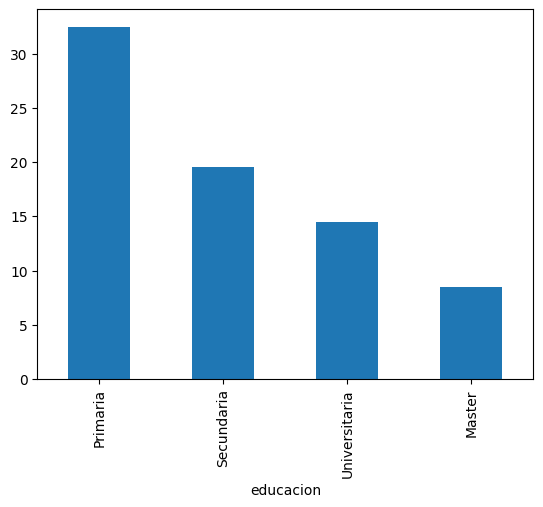

In [19]:
# Analisis por educación
temp = df.groupby('educacion').abandono.mean().sort_values(ascending = False) * 100
temp.plot.bar();

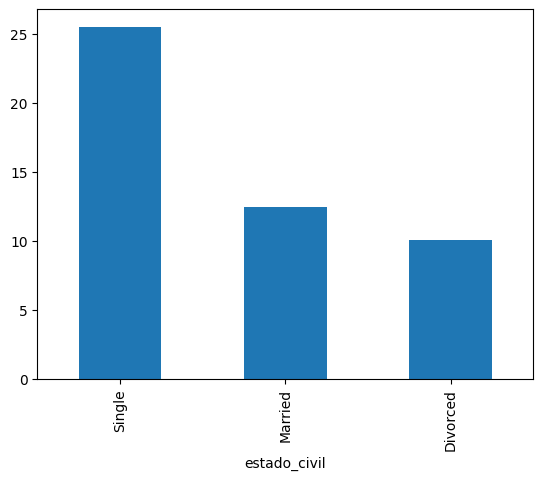

In [86]:
# Analisis por estado civil
temp = df.groupby('estado_civil').abandono.mean().sort_values(ascending = False) * 100
temp.plot.bar();

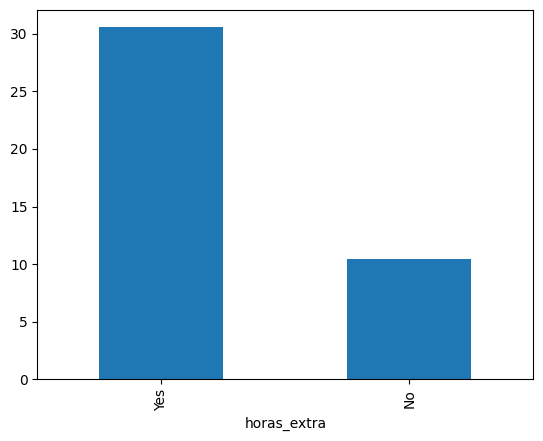

In [87]:
# Analisis por horas extras
temp = df.groupby('horas_extra').abandono.mean().sort_values(ascending = False) * 100
temp.plot.bar();

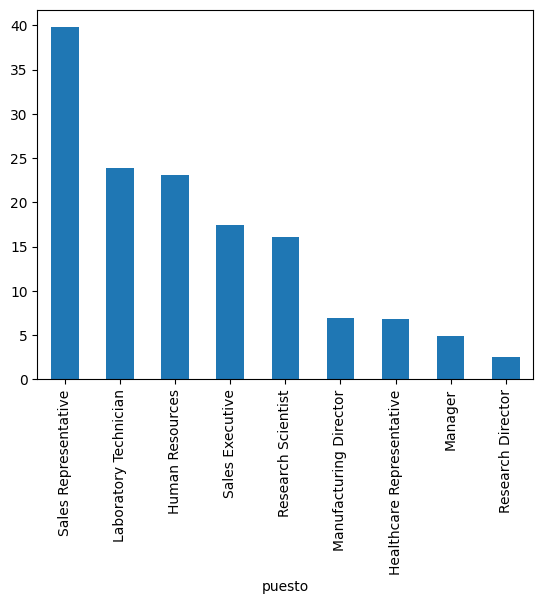

In [88]:
# Analisis por puesto
temp = df.groupby('puesto').abandono.mean().sort_values(ascending = False) * 100
temp.plot.bar();

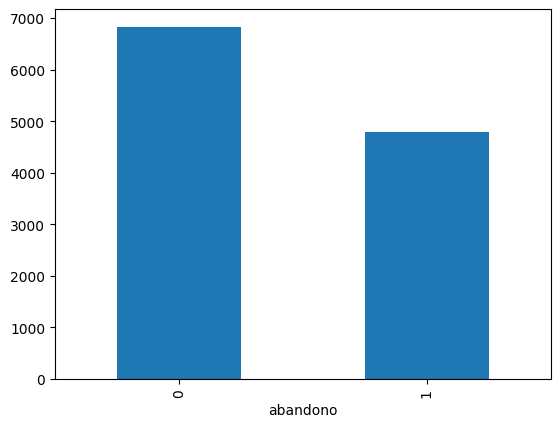

In [89]:
temp = df.groupby('abandono').salario_mes.mean()
temp.plot.bar();

Conclusiones:

El perfil medio del empleado que deja la empresa es:

* Bajo nivel educativo
* Soltero
* Trabaja en ventas
* Bajo salario
* Alta carga de horas extras

---
<br/><br/>

### ¿Cual es el impacto económico de este problema?

Según el estudio "Cost of Turnover" del Center for American Progress:

* El coste de la fuga de los empleados que ganan menos de 30000 es del 16,1% de su salario

* El coste de la fuga de los empleados que ganan entre 30000-50000 es del 19,7% de su salario

* El coste de la fuga de los empleados que ganan entre 50000-75000 es del 20,4% de su salario

* El coste de la fuga de los empleados que ganan más de 75000 es del 21% de su salario

In [20]:
# Creamos una nueva variable salario_ano del empleado
df['salario_ano'] = df.salario_mes.transform(lambda x: x*12)
df[['salario_mes','salario_ano']]

,salario_mes,salario_ano
id,,
1,5993,71916
2,5130,61560
4,2090,25080
5,2909,34908
7,3468,41616
...,...,...
2061,2571,30852
2062,9991,119892
2064,6142,73704


In [21]:
# Calculo el impacto económico de cada empleado si deja la empresa

#Lista de condiciones
condiciones = [(df['salario_ano'] <= 30000),
               (df['salario_ano'] > 30000) & (df['salario_ano'] <= 50000),
               (df['salario_ano'] > 50000) & (df['salario_ano'] <= 75000),
               (df['salario_ano'] > 75000)]

#Lista de resultados
resultados = [df.salario_ano * 0.161, df.salario_ano * 0.197, df.salario_ano * 0.204, df.salario_ano * 0.21]
                
#Aplicamos select
df['impacto_abandono'] = np.select(condiciones,resultados, default = -999)

df

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,satisfaccion_entorno,implicacion,nivel_laboral,...,evaluacion,satisfaccion_companeros,nivel_acciones,anos_experiencia,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual,salario_ano,impacto_abandono
id,,,,,,,,,,,,,,,,,,,,,
1,41,1,Travel_Rarely,Sales,1,Universitaria,Life Sciences,Media,Alta,2,...,Alta,Baja,0,8,0,6,0,5,71916,14670.864
2,49,0,Travel_Frequently,Research & Development,8,Secundaria,Life Sciences,Alta,Media,2,...,Muy_Alta,Muy_Alta,1,10,3,10,1,7,61560,12558.240
4,37,1,Travel_Rarely,Research & Development,2,Secundaria,Other,Muy_Alta,Media,1,...,Alta,Media,0,7,3,0,0,0,25080,4037.880
5,33,0,Travel_Frequently,Research & Development,3,Universitaria,Life Sciences,Muy_Alta,Alta,1,...,Alta,Alta,0,8,3,8,3,0,34908,6876.876
7,27,0,Travel_Rarely,Research & Development,2,Universitaria,Medical,Baja,Alta,1,...,Alta,Muy_Alta,1,6,3,2,2,2,41616,8198.352
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,0,Travel_Frequently,Research & Development,23,Master,Medical,Alta,Muy_Alta,2,...,Alta,Alta,1,17,3,5,0,3,30852,6077.844
2062,39,0,Travel_Rarely,Research & Development,6,Secundaria,Medical,Muy_Alta,Media,3,...,Alta,Baja,1,9,5,7,1,7,119892,25177.320
2064,27,0,Travel_Rarely,Research & Development,4,Master,Life Sciences,Media,Muy_Alta,2,...,Muy_Alta,Media,1,6,0,6,0,3,73704,15035.616


---
<br/><br/>

### ¿Cúanto nos costó este problema el año pasado?

In [22]:
coste_total =  df.loc[df.abandono == 1].impacto_abandono.sum()
coste_total

np.float64(2719005.912)

---
<br/><br/>

### ¿Cuanto nos cuesta que los empleados no estén motivados? (pérdidas en implicación == Baja)

In [123]:
df.loc[(df.abandono == 1) & (df.implicacion == 'Baja')].impacto_abandono.sum()

np.float64(0.0)

---
<br/><br/>

### ¿Cuanto dinero podríamos ahorrar fidelizando mejor a nuestros empleados?

In [24]:
print(f"Reducir un 10% la fuga de empleados nos ahorraría {int(coste_total * 0.1)}$ cada año.")

print(f"Reducir un 20% la fuga de empleados nos ahorraría {int(coste_total * 0.2)}$ cada año.")

print(f"Reducir un 30% la fuga de empleados nos ahorraría {int(coste_total * 0.3)}$ cada año.")

Reducir un 10% la fuga de empleados nos ahorraría 271900$ cada año.
Reducir un 20% la fuga de empleados nos ahorraría 543801$ cada año.
Reducir un 30% la fuga de empleados nos ahorraría 815701$ cada año.


---
<br/><br/>

### Y podemos seguir trazando estrategias asociadas a los insights de abandono:

Habíamos visto que los representantes de ventas son el puesto que más se van. ¿Tendría sentido hacer un plan específico para ellos? ¿Cual sería el coste ahorrado si disminuimos la fuga un 30%?

Primero vamos a calcular el % de representantes de ventas que se han ido el año pasado

In [23]:
total_repre_pasado = len(df.loc[df.puesto == 'Sales Representative'])
abandonos_repre_pasado = len(df.loc[(df.puesto == 'Sales Representative') & (df.abandono == 1)])
porc_pasado = abandonos_repre_pasado / total_repre_pasado

porc_pasado

0.39759036144578314

Ahora vamos a estimar cuántos se nos irán este año

In [26]:
total_repre_actual = len(df.loc[(df.puesto == 'Sales Representative') & (df.abandono == 0)])
se_iran = int(total_repre_actual * porc_pasado)

se_iran

19

Sobre ellos cuantos podemos retener (hipótesis 30%) y cuanto dinero puede suponer

In [27]:
retenemos = int(se_iran * 0.3)

ahorramos = df.loc[(df.puesto == 'Sales Representative') & (df.abandono == 0),'impacto_abandono'].sum() * porc_pasado * 0.3

print(f'Podemos retener {retenemos} representantes de ventas y ello supondría ahorrar {ahorramos}$.')

Podemos retener 5 representantes de ventas y ello supondría ahorrar 37447.22424578312$.


Este dato nos permite determinar el presupuesto para acciones de retención por departamento o perfil.

Ya que sabemos que podemos gastarnos hasta 37.000$ sólo en acciones específicas para retener a representantes de ventas y se estarían pagando sólas con la pérdida evitada

In [25]:
import joblib
import os

# Nos aseguramos de que exista el directorio antes de guardar el archivo
ruta_salida = 'artifacts/data/df_procesado.joblib'
os.makedirs(os.path.dirname(ruta_salida), exist_ok=True)

# Guardamos el DataFrame `df` como un objeto serializado para su reutilización
joblib.dump(df, ruta_salida)

['artifacts/data/df_procesado.joblib']

## DIA 3: MODELO DE MACHINE LEARNING

In [26]:
df_ml = df.copy()

In [27]:
df_ml.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1470 entries, 1 to 2068
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   edad                      1470 non-null   int64  
 1   abandono                  1470 non-null   int64  
 2   viajes                    1470 non-null   object 
 3   departamento              1470 non-null   object 
 4   distancia_casa            1470 non-null   int64  
 5   educacion                 1470 non-null   object 
 6   carrera                   1470 non-null   object 
 7   satisfaccion_entorno      1470 non-null   object 
 8   implicacion               1470 non-null   object 
 9   nivel_laboral             1470 non-null   int64  
 10  puesto                    1470 non-null   object 
 11  satisfaccion_trabajo      1470 non-null   object 
 12  estado_civil              1470 non-null   object 
 13  salario_mes               1470 non-null   int64  
 14  num_empresas_

### PREPARACIÓN DE LOS DATOS PARA LA MODELIZACIÓN

#### Transformar todas las variables categóricas a númericas

In [141]:
from sklearn.preprocessing import OneHotEncoder

#Categóricas
cat = df_ml.select_dtypes('O')

#Instanciamos
ohe = OneHotEncoder(sparse_output= False)

#Entrenamos
ohe.fit(cat)

#Aplicamos
cat_ohe = ohe.transform(cat)

#Ponemos los nombres
cat_ohe = pd.DataFrame(cat_ohe, columns = ohe.get_feature_names_out(input_features = cat.columns)).reset_index(drop = True)

In [127]:
cat_ohe

,abandono_No,abandono_Yes,viajes_Non-Travel,viajes_Travel_Frequently,viajes_Travel_Rarely,departamento_Human Resources,departamento_Research & Development,departamento_Sales,educacion_Master,educacion_Primaria,...,estado_civil_Married,estado_civil_Single,horas_extra_No,horas_extra_Yes,evaluacion_Alta,evaluacion_Muy_Alta,satisfaccion_companeros_Alta,satisfaccion_companeros_Baja,satisfaccion_companeros_Media,satisfaccion_companeros_Muy_Alta
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1466,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1467,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1468,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


#### Dataframe final

Seleccionamos las variables numéricas para poder juntarlas a las cat_hoe

In [142]:
num = df.select_dtypes('number').reset_index(drop = True)

Las juntamos todas en el dataframe final

In [143]:
df_ml = pd.concat([cat_ohe,num], axis = 1)
df_ml

,abandono_No,abandono_Yes,viajes_Non-Travel,viajes_Travel_Frequently,viajes_Travel_Rarely,departamento_Human Resources,departamento_Research & Development,departamento_Sales,educacion_Master,educacion_Primaria,...,num_formaciones_ult_ano,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual,salario_ano,impacto_abandono,ratio_estancamiento,indice_satisfaccion,nunca_promovido,ratio_formacion
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0,6,0,5,71916,14670.864,0.000000,2.4,0,0.000000
1,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,3,10,1,7,61560,12558.240,0.090909,3.0,0,0.272727
2,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,3,0,0,0,25080,4037.880,0.000000,2.6,1,3.000000
3,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,...,3,8,3,0,34908,6876.876,0.333333,3.2,0,0.333333
4,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,3,2,2,2,41616,8198.352,0.666667,2.8,1,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,3,5,0,3,30852,6077.844,0.000000,3.4,0,0.500000
1466,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,...,5,7,1,7,119892,25177.320,0.125000,2.4,0,0.625000
1467,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,...,0,6,0,3,73704,15035.616,0.000000,3.2,0,0.000000
1468,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,3,9,0,8,64680,13194.720,0.000000,3.0,0,0.300000


### DISEÑO Y ENTRENAMIENTO

#### Feature engineering

Se añaden variables derivadas para mejorar la señal de abandono:
- **ratio_estancamiento**: proporción del tiempo en la empresa sin promoción
- **indice_satisfaccion**: media de las variables ordinales de satisfacción/implicación/evaluación (se excluyen del OHE para evitar redundancia)
- **nunca_promovido**: indicador de no haber sido promovido
- **ratio_formacion**: formaciones recientes normalizadas por antigüedad

In [28]:
# Feature engineering en df (antes de construir X para el modelo)
# 1. Ratio estancamiento: años sin promoción / años en compañía
df["ratio_estancamiento"] = df["anos_desde_ult_promocion"] / (df["anos_compania"] + 1)

# 2. Índice de satisfacción (media de ordinales); excluiremos estas columnas del OHE
ORDEN_SATISFACCION = {"Baja": 1, "Media": 2, "Alta": 3, "Muy_Alta": 4}
cols_satisfaccion = [
    "satisfaccion_entorno", "satisfaccion_trabajo", "satisfaccion_companeros",
    "evaluacion", "implicacion"
]
df_sat = df[cols_satisfaccion].replace(ORDEN_SATISFACCION)
df["indice_satisfaccion"] = df_sat.mean(axis=1)

# 3. Nunca promovido
df["nunca_promovido"] = (df["anos_desde_ult_promocion"] >= df["anos_compania"]).astype(int)

# 4. Ratio formación / años en compañía
df["ratio_formacion"] = df["num_formaciones_ult_ano"] / (df["anos_compania"] + 1)

C:\Users\Dell\AppData\Local\Temp\ipykernel_8944\3145192804.py:11: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_sat = df[cols_satisfaccion].replace(ORDEN_SATISFACCION)


In [29]:
# Features en bruto para ColumnTransformer (numéricas + categóricas)
num_cols = [c for c in df.select_dtypes(include=[np.number]).columns 
            if c not in ['abandono', 'impacto_abandono', 'scoring_abandono']]
# Excluimos las columnas de satisfacción ordinales (ya resumidas en indice_satisfaccion)
# Excluimos el target para evitar data leakage (abandono puede ser object si no se ha convertido a 0/1)
cat_cols = [c for c in df.select_dtypes(include=['object']).columns 
            if c not in cols_satisfaccion and c != 'abandono']
X = df[num_cols + cat_cols].copy()
y = df['abandono']

In [30]:
from sklearn.model_selection import train_test_split

# Asegurarse de que la variable de salida sea numérica antes del split 
# (puede estar como 'Yes'/'No' en vez de 1/0)
if y.dtype == 'O' or y.dtype.name == 'category':
    # Asumimos que la codificación es 'Yes' para 1 y 'No' para 0
    y_numeric = y.replace({'Yes': 1, 'No': 0})
else:
    y_numeric = y

train_x, test_x, train_y, test_y = train_test_split(X, y_numeric, test_size=0.3, random_state=42) 

In [31]:
# Pipeline de preprocesado: numéricas (imputar + escalar) y categóricas (OneHot)
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

preprocessor = ColumnTransformer([
    ("num", Pipeline([
        ("impute", SimpleImputer(strategy="median")),
        ("scale", StandardScaler()),
    ]), num_cols),
    ("cat", OneHotEncoder(sparse_output=False, handle_unknown="ignore"), cat_cols),
])
preprocessor.fit(train_x)
train_x_t = preprocessor.transform(train_x)
test_x_t = preprocessor.transform(test_x)
feature_names = preprocessor.get_feature_names_out()

In [32]:
# Configuración: RandomizedSearchCV, evaluación y optimización de umbral
from sklearn.model_selection import RandomizedSearchCV, cross_val_predict
from sklearn.base import clone
from sklearn.metrics import (
    average_precision_score,
    f1_score,
    precision_score,
    recall_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
)


def optimizar_umbral(y_true, y_pred_proba, metric="aupr", umbrales=None):
    """Encuentra el umbral que maximiza F1 (o la métrica indicada) en validación."""
    if umbrales is None:
        umbrales = np.linspace(0.25, 0.5, 11)
    best_t, best_score = 0.5, 0.0
    for t in umbrales:
        y_p = (y_pred_proba >= t).astype(int)
        s = f1_score(y_true, y_p, zero_division=0)
        if s > best_score:
            best_score, best_t = s, t
    return best_t, best_score


def evaluar_clasificador(y_true, y_pred_proba, nombre_modelo="", umbral=0.5):
    """
    Evalúa un clasificador binario con AUPR, F1, Precision, Recall y matriz de confusión.
    y_true: etiquetas reales, y_pred_proba: probabilidades de la clase positiva (1).
    umbral: umbral de decisión (por defecto 0.5; puede optimizarse con optimizar_umbral).
    """
    # #region agent log
    import json, time
    with open(r"c:\Agus\Primera Semana\debug.log", "a", encoding="utf-8") as _f:
        _f.write(json.dumps({"hypothesisId": "H1_H5", "location": "evaluar_clasificador", "message": "eval_inputs", "data": {"len_y_true": len(y_true), "y_true_sum": int(np.asarray(y_true).sum()), "y_pred_proba_min": float(np.min(y_pred_proba)), "y_pred_proba_max": float(np.max(y_pred_proba)), "umbral": umbral}, "timestamp": int(time.time()*1000)}) + "\n")
    # #endregion
    y_pred = (y_pred_proba >= umbral).astype(int)
    aupr = average_precision_score(y_true, y_pred_proba)
    f1 = f1_score(y_true, y_pred, zero_division=0)
    precision = precision_score(y_true, y_pred, zero_division=0)
    recall = recall_score(y_true, y_pred, zero_division=0)
    cm = confusion_matrix(y_true, y_pred)

    print(f"{'='*50}")
    if nombre_modelo:
        print(f"Modelo: {nombre_modelo}")
    print(f"{'='*50}")
    print(f"AUPR:      {aupr:.4f}")
    print(f"F1:       {f1:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall:   {recall:.4f}")
    print(f"Matriz de confusión:\n{cm}")
    print()

    # Visualización de la matriz de confusión
    fig, ax = plt.subplots(figsize=(5, 4))
    ConfusionMatrixDisplay.from_predictions(y_true, y_pred, ax=ax)
    plt.title(f"Matriz de confusión - {nombre_modelo}" if nombre_modelo else "Matriz de confusión")
    plt.tight_layout()
    plt.show()

    return {"AUPR": aupr, "F1": f1, "Precision": precision, "Recall": recall, "confusion_matrix": cm}

In [33]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

# Aseguramos que train_y es numérico (0/1) y no 'No'/'Yes'
if train_y.dtype == object or train_y.dtype.name == 'category':
    # Asumiendo que 'Yes' debe ser 1 y 'No' debe ser 0
    y_map = {'No': 0, 'Yes': 1}
    train_y_num = train_y.map(y_map) if hasattr(train_y, "map") else train_y.replace(y_map)
else:
    train_y_num = train_y

# Espacio de búsqueda para el árbol de decisión (con class_weight por desbalance)
param_dist_dt = {
    "max_depth": [3, 5, 7, 10, 15, 20, None],
    "min_samples_split": [2, 5, 10, 20],
    "min_samples_leaf": [1, 2, 5, 10],
    "criterion": ["gini", "entropy"],
}

base_dt = DecisionTreeClassifier(class_weight="balanced", random_state=42)
busqueda_dt = RandomizedSearchCV(
    base_dt,
    param_distributions=param_dist_dt,
    n_iter=25,
    cv=5,
    scoring="average_precision",
    random_state=42,
    refit=True,
)
busqueda_dt.fit(train_x_t, train_y_num)
ac = busqueda_dt.best_estimator_
oof_proba_dt = cross_val_predict(clone(ac), train_x_t, train_y_num, cv=5, method="predict_proba")[:, 1]
best_umbral_dt, _ = optimizar_umbral(train_y_num, oof_proba_dt)
print(f"Mejores parámetros (Decision Tree): {busqueda_dt.best_params_}")
print(f"Umbral óptimo (aupr): {best_umbral_dt:.3f}")

Mejores parámetros (Decision Tree): {'min_samples_split': 5, 'min_samples_leaf': 5, 'max_depth': 5, 'criterion': 'gini'}
Umbral óptimo (aupr): 0.475


### PREDICCIÓN Y VALIDACIÓN SOBRE TEST

Modelo: Decision Tree
AUPR:      0.3604
F1:       0.4023
Precision: 0.3097
Recall:   0.5738
Matriz de confusión:
[[302  78]
 [ 26  35]]



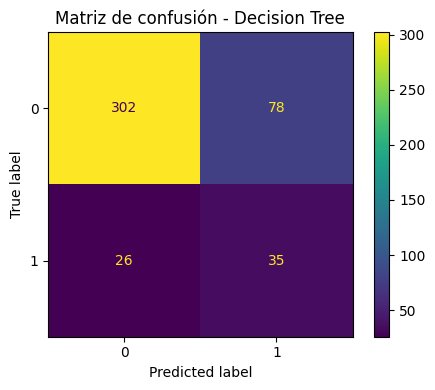

{'AUPR': 0.3604454388758045,
 'F1': 0.40229885057471265,
 'Precision': 0.30973451327433627,
 'Recall': 0.5737704918032787,
 'confusion_matrix': array([[302,  78],
        [ 26,  35]])}

In [34]:
# Predicción de probabilidad de abandono (datos transformados por el preprocessor)
pred = ac.predict_proba(test_x_t)[:, 1]
pred[:20]

# Si test_y está en ['No', 'Yes'] hay que pasar a 0/1 para métricas que usan pos_label=1 (como F1, AUPR)
if test_y.dtype == object or test_y.dtype.name == 'category':
    y_map = {'No': 0, 'Yes': 1}
    test_y_eval = test_y.map(y_map) if hasattr(test_y, "map") else test_y.replace(y_map)
else:
    test_y_eval = test_y

# Evaluación con umbral optimizado en validación
evaluar_clasificador(test_y_eval, pred, "Decision Tree", umbral=best_umbral_dt)

In [178]:
# Evaluación
from sklearn.metrics import roc_auc_score

roc_auc_score(test_y,pred)

0.7171915444348577

Mejores parámetros (Random Forest): {'n_estimators': 300, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 20}
Umbral óptimo (F1): 0.400
Modelo: Random Forest
AUPR:      0.4043
F1:       0.4000
Precision: 0.3906
Recall:   0.4098
Matriz de confusión:
[[341  39]
 [ 36  25]]



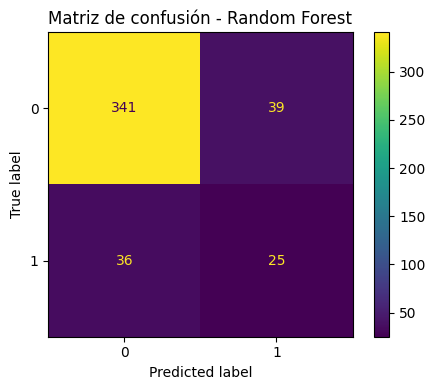

{'AUPR': 0.40428896702724976,
 'F1': 0.4,
 'Precision': 0.390625,
 'Recall': 0.4098360655737705,
 'confusion_matrix': array([[341,  39],
        [ 36,  25]])}

In [179]:
# Random Forest con RandomizedSearchCV (class_weight por desbalance)
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

param_dist_rf = {
    "n_estimators": [50, 100, 200, 300],
    "max_depth": [5, 10, 15, 20, None],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 5],
    "max_features": ["sqrt", "log2", None],
}

base_rf = RandomForestClassifier(class_weight="balanced", random_state=42)
busqueda_rf = RandomizedSearchCV(
    base_rf,
    param_distributions=param_dist_rf,
    n_iter=25,
    cv=5,
    scoring="average_precision",
    random_state=42,
    refit=True,
)
busqueda_rf.fit(train_x_t, train_y)
model_rf = busqueda_rf.best_estimator_
oof_proba_rf = cross_val_predict(clone(model_rf), train_x_t, train_y, cv=5, method="predict_proba")[:, 1]
best_umbral_rf, _ = optimizar_umbral(train_y, oof_proba_rf)
pred_rf = model_rf.predict_proba(test_x_t)[:, 1]
print(f"Mejores parámetros (Random Forest): {busqueda_rf.best_params_}")
print(f"Umbral óptimo (F1): {best_umbral_rf:.3f}")
evaluar_clasificador(test_y, pred_rf, "Random Forest", umbral=best_umbral_rf)

c:\Users\Dell\miniconda3\envs\avanzado-venv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:22:02] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Dell\miniconda3\envs\avanzado-venv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:22:03] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Dell\miniconda3\envs\avanzado-venv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:22:03] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Dell\miniconda3\envs\avanzado-venv\lib\site-packages\xgboost\training.py:199: UserWarning: [10:22:03] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.

Mejores parámetros (XGBoost): {'subsample': 0.7, 'n_estimators': 300, 'min_child_weight': 5, 'max_depth': 5, 'learning_rate': 0.01, 'colsample_bytree': 0.8}
Umbral óptimo (F1): 0.500
Modelo: XGBoost
AUPR:      0.4043
F1:       0.4098
Precision: 0.4098
Recall:   0.4098
Matriz de confusión:
[[344  36]
 [ 36  25]]



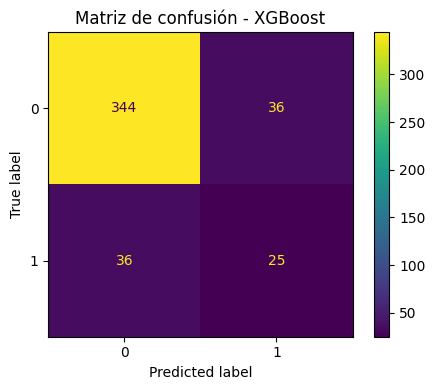

{'AUPR': 0.40434618148115054,
 'F1': 0.4098360655737705,
 'Precision': 0.4098360655737705,
 'Recall': 0.4098360655737705,
 'confusion_matrix': array([[344,  36],
        [ 36,  25]])}

In [180]:
# XGBoost con RandomizedSearchCV (scale_pos_weight por desbalance)
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV

scale_pos_weight = (train_y == 0).sum() / max((train_y == 1).sum(), 1)

param_dist_xgb = {
    "n_estimators": [50, 100, 200, 300],
    "max_depth": [3, 5, 7, 9],
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    "subsample": [0.7, 0.8, 0.9, 1.0],
    "colsample_bytree": [0.7, 0.8, 0.9, 1.0],
    "min_child_weight": [1, 3, 5],
}

base_xgb = XGBClassifier(
    scale_pos_weight=scale_pos_weight,
    random_state=42,
    use_label_encoder=False,
    eval_metric="logloss",
)
busqueda_xgb = RandomizedSearchCV(
    base_xgb,
    param_distributions=param_dist_xgb,
    n_iter=25,
    cv=5,
    scoring="average_precision",
    random_state=42,
    refit=True,
)
busqueda_xgb.fit(train_x_t, train_y)
model_xgb = busqueda_xgb.best_estimator_
oof_proba_xgb = cross_val_predict(clone(model_xgb), train_x_t, train_y, cv=5, method="predict_proba")[:, 1]
best_umbral_xgb, _ = optimizar_umbral(train_y, oof_proba_xgb)
pred_xgb = model_xgb.predict_proba(test_x_t)[:, 1]
print(f"Mejores parámetros (XGBoost): {busqueda_xgb.best_params_}")
print(f"Umbral óptimo (F1): {best_umbral_xgb:.3f}")
evaluar_clasificador(test_y, pred_xgb, "XGBoost", umbral=best_umbral_xgb)

[LightGBM] [Info] Number of positive: 141, number of negative: 682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000427 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 908
[LightGBM] [Info] Number of data points in the train set: 823, number of used features: 46
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.171324 -> initscore=-1.576270
[LightGBM] [Info] Start training from score -1.576270
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

c:\Users\Dell\miniconda3\envs\avanzado-venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\Dell\miniconda3\envs\avanzado-venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

c:\Users\Dell\miniconda3\envs\avanzado-venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\Dell\miniconda3\envs\avanzado-venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

c:\Users\Dell\miniconda3\envs\avanzado-venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\Dell\miniconda3\envs\avanzado-venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 141, number of negative: 682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000363 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 912
[LightGBM] [Info] Number of data points in the train set: 823, number of used features: 47
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.171324 -> initscore=-1.576270
[LightGBM] [Info] Start training from score -1.576270
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

c:\Users\Dell\miniconda3\envs\avanzado-venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\Dell\miniconda3\envs\avanzado-venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

c:\Users\Dell\miniconda3\envs\avanzado-venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\Dell\miniconda3\envs\avanzado-venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\Dell\miniconda3\envs\avanzado-venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 141, number of negative: 683
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000177 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 916
[LightGBM] [Info] Number of data points in the train set: 824, number of used features: 47
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.171117 -> initscore=-1.577735
[LightGBM] [Info] Start training from score -1.577735
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

c:\Users\Dell\miniconda3\envs\avanzado-venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\Dell\miniconda3\envs\avanzado-venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\Dell\miniconda3\envs\avanzado-venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\Dell\miniconda3\envs\avanzado-venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

c:\Users\Dell\miniconda3\envs\avanzado-venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\Dell\miniconda3\envs\avanzado-venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

c:\Users\Dell\miniconda3\envs\avanzado-venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

c:\Users\Dell\miniconda3\envs\avanzado-venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\Dell\miniconda3\envs\avanzado-venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\Dell\miniconda3\envs\avanzado-venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\Dell\miniconda3\envs\avanzado-venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 141, number of negative: 682
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000177 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 912
[LightGBM] [Info] Number of data points in the train set: 823, number of used features: 47
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.171324 -> initscore=-1.576270
[LightGBM] [Info] Start training from score -1.576270
[LightGBM] [Info] Number of positive: 141, number of negative: 682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000404 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 913
[LightGBM] [Info] Number of data points in the train set: 823, number of used features: 47
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.171324 -> initscore=-1.576270
[LightGBM] [Info

c:\Users\Dell\miniconda3\envs\avanzado-venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\Dell\miniconda3\envs\avanzado-venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 140, number of negative: 683
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000207 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 917
[LightGBM] [Info] Number of data points in the train set: 823, number of used features: 47
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.170109 -> initscore=-1.584852
[LightGBM] [Info] Start training from score -1.584852
[LightGBM] [Info] Number of positive: 141, number of negative: 683
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000457 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 916
[LightGBM] [Info] Number of data points in the train set: 824, number of used features: 47
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.171117 -> initscore=-1.577735
[LightGBM] [Info] Start training from score -1.577735


c:\Users\Dell\miniconda3\envs\avanzado-venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 141, number of negative: 682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000306 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 910
[LightGBM] [Info] Number of data points in the train set: 823, number of used features: 47
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.171324 -> initscore=-1.576270
[LightGBM] [Info] Start training from score -1.576270
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

c:\Users\Dell\miniconda3\envs\avanzado-venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 141, number of negative: 682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000199 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 912
[LightGBM] [Info] Number of data points in the train set: 823, number of used features: 47
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.171324 -> initscore=-1.576270
[LightGBM] [Info] Start training from score -1.576270
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

c:\Users\Dell\miniconda3\envs\avanzado-venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 141, number of negative: 682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000397 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 913
[LightGBM] [Info] Number of data points in the train set: 823, number of used features: 47
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.171324 -> initscore=-1.576270
[LightGBM] [Info] Start training from score -1.576270
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

c:\Users\Dell\miniconda3\envs\avanzado-venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 140, number of negative: 683
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000295 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 917
[LightGBM] [Info] Number of data points in the train set: 823, number of used features: 47
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.170109 -> initscore=-1.584852
[LightGBM] [Info] Start training from score -1.584852
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

c:\Users\Dell\miniconda3\envs\avanzado-venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 141, number of negative: 683
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000185 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 916
[LightGBM] [Info] Number of data points in the train set: 824, number of used features: 47
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.171117 -> initscore=-1.577735
[LightGBM] [Info] Start training from score -1.577735
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

c:\Users\Dell\miniconda3\envs\avanzado-venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\Dell\miniconda3\envs\avanzado-venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\Dell\miniconda3\envs\avanzado-venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\Dell\miniconda3\envs\avanzado-venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\Dell\miniconda3\envs\avanzado-venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LG

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

c:\Users\Dell\miniconda3\envs\avanzado-venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\Dell\miniconda3\envs\avanzado-venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\Dell\miniconda3\envs\avanzado-venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\Dell\miniconda3\envs\avanzado-venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

c:\Users\Dell\miniconda3\envs\avanzado-venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\Dell\miniconda3\envs\avanzado-venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\Dell\miniconda3\envs\avanzado-venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 141, number of negative: 682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000290 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 913
[LightGBM] [Info] Number of data points in the train set: 823, number of used features: 47
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.171324 -> initscore=-1.576270
[LightGBM] [Info] Start training from score -1.576270
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

c:\Users\Dell\miniconda3\envs\avanzado-venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\Dell\miniconda3\envs\avanzado-venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\Dell\miniconda3\envs\avanzado-venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 141, number of negative: 682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000294 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 910
[LightGBM] [Info] Number of data points in the train set: 823, number of used features: 47
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.171324 -> initscore=-1.576270
[LightGBM] [Info] Start training from score -1.576270


c:\Users\Dell\miniconda3\envs\avanzado-venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\Dell\miniconda3\envs\avanzado-venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 141, number of negative: 682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000203 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 912
[LightGBM] [Info] Number of data points in the train set: 823, number of used features: 47
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.171324 -> initscore=-1.576270
[LightGBM] [Info] Start training from score -1.576270
[LightGBM] [Info] Number of positive: 141, number of negative: 682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000192 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 913
[LightGBM] [Info] Number of data points in the train set: 823, number of used features: 47
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.171324 -> initscore=-1.576270
[LightGBM] [Info] Start training from score -1.576270


c:\Users\Dell\miniconda3\envs\avanzado-venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\Dell\miniconda3\envs\avanzado-venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 140, number of negative: 683
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000222 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 917
[LightGBM] [Info] Number of data points in the train set: 823, number of used features: 47
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.170109 -> initscore=-1.584852
[LightGBM] [Info] Start training from score -1.584852
[LightGBM] [Info] Number of positive: 141, number of negative: 683
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000354 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 916
[LightGBM] [Info] Number of data points in the train set: 824, number of used features: 47
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.171117 -> initscore=-1.577735
[LightGBM] [Info] Start training from score -1.577735


c:\Users\Dell\miniconda3\envs\avanzado-venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\Dell\miniconda3\envs\avanzado-venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\Dell\miniconda3\envs\avanzado-venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 141, number of negative: 682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000218 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 908
[LightGBM] [Info] Number of data points in the train set: 823, number of used features: 46
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.171324 -> initscore=-1.576270
[LightGBM] [Info] Start training from score -1.576270
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

c:\Users\Dell\miniconda3\envs\avanzado-venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\Dell\miniconda3\envs\avanzado-venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\Dell\miniconda3\envs\avanzado-venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

c:\Users\Dell\miniconda3\envs\avanzado-venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\Dell\miniconda3\envs\avanzado-venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\Dell\miniconda3\envs\avanzado-venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\Dell\miniconda3\envs\avanzado-venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\Dell\miniconda3\envs\avanzado-venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LG

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

c:\Users\Dell\miniconda3\envs\avanzado-venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\Dell\miniconda3\envs\avanzado-venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\Dell\miniconda3\envs\avanzado-venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 141, number of negative: 683
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000356 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 914
[LightGBM] [Info] Number of data points in the train set: 824, number of used features: 46
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.171117 -> initscore=-1.577735
[LightGBM] [Info] Start training from score -1.577735
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

c:\Users\Dell\miniconda3\envs\avanzado-venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\Dell\miniconda3\envs\avanzado-venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\Dell\miniconda3\envs\avanzado-venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\Dell\miniconda3\envs\avanzado-venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\Dell\miniconda3\envs\avanzado-venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LG

[LightGBM] [Info] Number of positive: 140, number of negative: 683
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000366 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 917
[LightGBM] [Info] Number of data points in the train set: 823, number of used features: 47
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.170109 -> initscore=-1.584852
[LightGBM] [Info] Start training from score -1.584852
[LightGBM] [Info] Number of positive: 141, number of negative: 683
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000343 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 916
[LightGBM] [Info] Number of data points in the train set: 824, number of used features: 47
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.171117 -> initscore=-1.577735
[LightGBM] [Info] Start training from score -1.577735
[LightGBM] [Info] Number o

c:\Users\Dell\miniconda3\envs\avanzado-venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\Dell\miniconda3\envs\avanzado-venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\Dell\miniconda3\envs\avanzado-venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\Dell\miniconda3\envs\avanzado-venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 141, number of negative: 682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000242 seconds.
You 

c:\Users\Dell\miniconda3\envs\avanzado-venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\Dell\miniconda3\envs\avanzado-venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\Dell\miniconda3\envs\avanzado-venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

c:\Users\Dell\miniconda3\envs\avanzado-venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\Dell\miniconda3\envs\avanzado-venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

c:\Users\Dell\miniconda3\envs\avanzado-venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\Dell\miniconda3\envs\avanzado-venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

c:\Users\Dell\miniconda3\envs\avanzado-venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\Dell\miniconda3\envs\avanzado-venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

c:\Users\Dell\miniconda3\envs\avanzado-venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\Dell\miniconda3\envs\avanzado-venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\Dell\miniconda3\envs\avanzado-venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\Dell\miniconda3\envs\avanzado-venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\Dell\miniconda3\envs\avanzado-venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LG

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

c:\Users\Dell\miniconda3\envs\avanzado-venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004855 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 910
[LightGBM] [Info] Number of data points in the train set: 823, number of used features: 46
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.171324 -> initscore=-1.576270
[LightGBM] [Info] Start training from score -1.576270
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive ga

c:\Users\Dell\miniconda3\envs\avanzado-venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\Dell\miniconda3\envs\avanzado-venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 141, number of negative: 682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000599 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 911
[LightGBM] [Info] Number of data points in the train set: 823, number of used features: 46
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.171324 -> initscore=-1.576270
[LightGBM] [Info] Start training from score -1.576270
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

c:\Users\Dell\miniconda3\envs\avanzado-venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\Dell\miniconda3\envs\avanzado-venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

c:\Users\Dell\miniconda3\envs\avanzado-venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\Dell\miniconda3\envs\avanzado-venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

c:\Users\Dell\miniconda3\envs\avanzado-venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

c:\Users\Dell\miniconda3\envs\avanzado-venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\Dell\miniconda3\envs\avanzado-venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

c:\Users\Dell\miniconda3\envs\avanzado-venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\Dell\miniconda3\envs\avanzado-venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Info] Number of positive: 141, number of negative: 682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000209 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 909
[LightGBM] [Info] Number of data points in the train set: 823, number of used features: 45
[LightGBM] [Info] [binary:BoostFromScore]: pavg

c:\Users\Dell\miniconda3\envs\avanzado-venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 140, number of negative: 683
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000307 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 913
[LightGBM] [Info] Number of data points in the train set: 823, number of used features: 45
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.170109 -> initscore=-1.584852
[LightGBM] [Info] Start training from score -1.584852
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

c:\Users\Dell\miniconda3\envs\avanzado-venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\Dell\miniconda3\envs\avanzado-venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 141, number of negative: 683
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000184 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 912
[LightGBM] [Info] Number of data points in the train set: 824, number of used features: 45
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.171117 -> initscore=-1.577735
[LightGBM] [Info] Start training from score -1.577735
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

c:\Users\Dell\miniconda3\envs\avanzado-venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\Dell\miniconda3\envs\avanzado-venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\Dell\miniconda3\envs\avanzado-venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\Dell\miniconda3\envs\avanzado-venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

c:\Users\Dell\miniconda3\envs\avanzado-venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

c:\Users\Dell\miniconda3\envs\avanzado-venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

c:\Users\Dell\miniconda3\envs\avanzado-venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

c:\Users\Dell\miniconda3\envs\avanzado-venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\Dell\miniconda3\envs\avanzado-venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

c:\Users\Dell\miniconda3\envs\avanzado-venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\Dell\miniconda3\envs\avanzado-venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Info] Number of positive: 141, number of negative: 682
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000333 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 908
[LightGBM] [Info] Number of data points in the train set: 823, number of used features: 45
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.171324 -> initscore=-1.576270
[LightGBM] [Info] Start training from score -1.576270
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

c:\Users\Dell\miniconda3\envs\avanzado-venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\Dell\miniconda3\envs\avanzado-venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

c:\Users\Dell\miniconda3\envs\avanzado-venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\Dell\miniconda3\envs\avanzado-venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

c:\Users\Dell\miniconda3\envs\avanzado-venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\Dell\miniconda3\envs\avanzado-venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\Dell\miniconda3\envs\avanzado-venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

c:\Users\Dell\miniconda3\envs\avanzado-venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\Dell\miniconda3\envs\avanzado-venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

c:\Users\Dell\miniconda3\envs\avanzado-venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\Dell\miniconda3\envs\avanzado-venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\Dell\miniconda3\envs\avanzado-venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\Dell\miniconda3\envs\avanzado-venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(
c:\Users\Dell\miniconda3\envs\avanzado-venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LG

[LightGBM] [Info] Number of positive: 141, number of negative: 683
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000186 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 912
[LightGBM] [Info] Number of data points in the train set: 824, number of used features: 45
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.171117 -> initscore=-1.577735
[LightGBM] [Info] Start training from score -1.577735
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best

c:\Users\Dell\miniconda3\envs\avanzado-venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


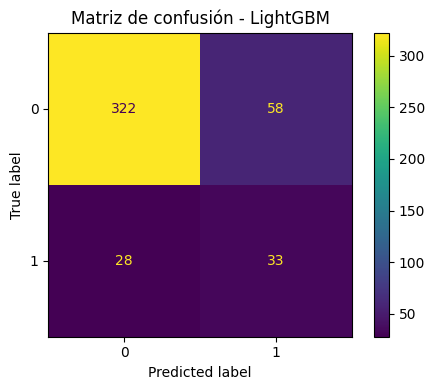

{'AUPR': 0.4095085064753332,
 'F1': 0.4342105263157895,
 'Precision': 0.3626373626373626,
 'Recall': 0.5409836065573771,
 'confusion_matrix': array([[322,  58],
        [ 28,  33]])}

In [183]:
# LightGBM con RandomizedSearchCV (scale_pos_weight por desbalance)
import warnings
from lightgbm import LGBMClassifier
from sklearn.model_selection import RandomizedSearchCV

scale_pos_weight = (train_y == 0).sum() / max((train_y == 1).sum(), 1)

param_dist_lgb = {
    "n_estimators": [50, 100, 200, 300],
    "max_depth": [3, 5, 7, 10, -1],
    "learning_rate": [0.01, 0.05, 0.1, 0.2],
    "num_leaves": [31, 50, 70, 100],
    "min_child_samples": [5, 10, 20, 30],
    "subsample": [0.7, 0.8, 0.9, 1.0],
    "colsample_bytree": [0.7, 0.8, 0.9, 1.0],
}

base_lgb = LGBMClassifier(scale_pos_weight=scale_pos_weight, random_state=42)

with warnings.catch_warnings():
    warnings.filterwarnings("ignore", message="No further splits with positive gain, best gain: -inf")  # LightGBM warning suppress
    busqueda_lgb = RandomizedSearchCV(
        base_lgb,
        param_distributions=param_dist_lgb,
        n_iter=25,
        cv=5,
        scoring="average_precision",
        random_state=42,
        refit=True,
    )
    busqueda_lgb.fit(train_x_t, train_y)

model_lgb = busqueda_lgb.best_estimator_
oof_proba_lgb = cross_val_predict(clone(model_lgb), train_x_t, train_y, cv=5, method="predict_proba")[:, 1]
best_umbral_lgb, _ = optimizar_umbral(train_y, oof_proba_lgb)
pred_lgb = model_lgb.predict_proba(test_x_t)[:, 1]
print(f"Mejores parámetros (LightGBM): {busqueda_lgb.best_params_}")
print(f"Umbral óptimo (F1): {best_umbral_lgb:.3f}")
evaluar_clasificador(test_y, pred_lgb, "LightGBM", umbral=best_umbral_lgb)

### Modelos con SMOTE (RF, XGBoost, LightGBM)

Se añade una rama con **SMOTE** (Synthetic Minority Over-sampling) para mejorar AUPR. Se usa el **Pipeline de imblearn** para que SMOTE se aplique solo a los folds de entrenamiento en la validación cruzada y nunca al test.

**Dependencia:** instalar con `pip install imbalanced-learn` si no está instalado.

In [36]:
# Configuración común SMOTE (solo en train, vía Pipeline imblearn)
# sampling_strategy=0.6 y cv=3, n_iter=10 limitan tiempo de cómputo; se pueden subir si hay más capacidad.
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as ImbPipeline

N_ITER_SMOTE = 10
CV_SMOTE = 3

smote_kwargs = dict(
    random_state=42,
    k_neighbors=3,
    sampling_strategy=0.6,
    n_jobs=-1,
)

Despues de evaluar los modelos entrenados con **SMOTE** (Random Forest, XGBoost y LightGBM) sobre el conjunto de test, se elige **XGBoost (SMOTE)** como modelo de referencia para la detección de churn. La decisión se fundamenta en la **métrica AUPR**, en el **balance entre verdaderos positivos y falsos positivos** y en un criterio de **costo operativo** asociado a los falsos positivos.

c:\Users\Dell\miniconda3\envs\avanzado-venv\lib\site-packages\xgboost\training.py:199: UserWarning: [11:17:54] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Dell\miniconda3\envs\avanzado-venv\lib\site-packages\xgboost\training.py:199: UserWarning: [11:17:55] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Dell\miniconda3\envs\avanzado-venv\lib\site-packages\xgboost\training.py:199: UserWarning: [11:17:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\Dell\miniconda3\envs\avanzado-venv\lib\site-packages\xgboost\training.py:199: UserWarning: [11:17:59] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.

Mejores parámetros (XGBoost SMOTE): {'clf__subsample': 0.9, 'clf__n_estimators': 50, 'clf__min_child_weight': 5, 'clf__max_depth': 5, 'clf__learning_rate': 0.1, 'clf__colsample_bytree': 0.7}
Umbral óptimo (F1): 0.500
Modelo: XGBoost (SMOTE)
AUPR:      0.4202
F1:       0.4371
Precision: 0.3667
Recall:   0.5410
Matriz de confusión:
[[323  57]
 [ 28  33]]



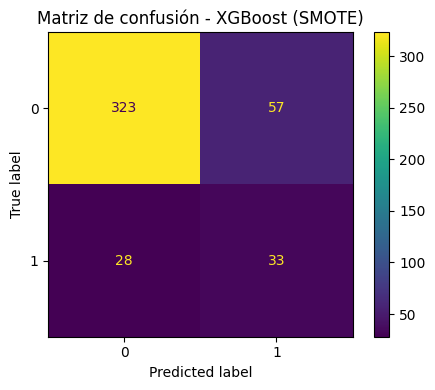

{'AUPR': 0.4201714068916632,
 'F1': 0.4370860927152318,
 'Precision': 0.36666666666666664,
 'Recall': 0.5409836065573771,
 'confusion_matrix': array([[323,  57],
        [ 28,  33]])}

In [38]:
# XGBoost con SMOTE (Pipeline imblearn: SMOTE solo en train)
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV, cross_val_predict
from sklearn.base import clone

# Corregir: SMOTE no acepta 'n_jobs' como argumento, lo quitamos aquí
smote_kwargs_xgb = smote_kwargs.copy()
if 'n_jobs' in smote_kwargs_xgb:
    smote_kwargs_xgb.pop('n_jobs')

scale_pos_weight = (train_y == 0).sum() / max((train_y == 1).sum(), 1)

pipeline_smote_xgb = ImbPipeline([
    ("smote", SMOTE(**smote_kwargs_xgb)),
    ("clf", XGBClassifier(
        scale_pos_weight=scale_pos_weight,
        random_state=42,
        use_label_encoder=False,
        eval_metric="logloss",
    )),
])

param_dist_xgb_smote = {
    "clf__n_estimators": [50, 100, 200, 300],
    "clf__max_depth": [3, 5, 7, 9],
    "clf__learning_rate": [0.01, 0.05, 0.1, 0.2],
    "clf__subsample": [0.7, 0.8, 0.9, 1.0],
    "clf__colsample_bytree": [0.7, 0.8, 0.9, 1.0],
    "clf__min_child_weight": [1, 3, 5],
}

busqueda_smote_xgb = RandomizedSearchCV(
    pipeline_smote_xgb,
    param_distributions=param_dist_xgb_smote,
    n_iter=N_ITER_SMOTE,
    cv=CV_SMOTE,
    scoring="average_precision",
    random_state=42,
    refit=True,
)
busqueda_smote_xgb.fit(train_x_t, train_y)
pipeline_smote_xgb = busqueda_smote_xgb.best_estimator_

oof_proba_smote_xgb = cross_val_predict(
    clone(pipeline_smote_xgb), train_x_t, train_y, cv=CV_SMOTE, method="predict_proba"
)[:, 1]
best_umbral_smote_xgb, _ = optimizar_umbral(train_y, oof_proba_smote_xgb)

pred_smote_xgb = pipeline_smote_xgb.predict_proba(test_x_t)[:, 1]
print(f"Mejores parámetros (XGBoost SMOTE): {busqueda_smote_xgb.best_params_}")
print(f"Umbral óptimo (F1): {best_umbral_smote_xgb:.3f}")
evaluar_clasificador(test_y, pred_smote_xgb, "XGBoost (SMOTE)", umbral=best_umbral_smote_xgb)

[LightGBM] [Info] Number of positive: 340, number of negative: 568
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.016544 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1972
[LightGBM] [Info] Number of data points in the train set: 908, number of used features: 46
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.374449 -> initscore=-0.513176
[LightGBM] [Info] Start training from score -0.513176
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, bes

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

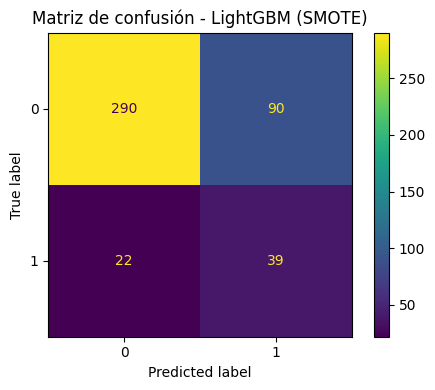

{'AUPR': 0.4117885948609872,
 'F1': 0.4105263157894737,
 'Precision': 0.3023255813953488,
 'Recall': 0.639344262295082,
 'confusion_matrix': array([[290,  90],
        [ 22,  39]])}

In [40]:
# LightGBM con SMOTE (Pipeline imblearn: SMOTE solo en train)
import warnings
from lightgbm import LGBMClassifier
from sklearn.model_selection import RandomizedSearchCV, cross_val_predict
from sklearn.base import clone

# Ignorar todos los warnings
warnings.filterwarnings("ignore")

# Solución para el error de SMOTE con n_jobs: eliminar si está presente
smote_kwargs_lgb = smote_kwargs.copy()
if 'n_jobs' in smote_kwargs_lgb:
    smote_kwargs_lgb.pop('n_jobs')

scale_pos_weight = (train_y == 0).sum() / max((train_y == 1).sum(), 1)

pipeline_smote_lgb = ImbPipeline([
    ("smote", SMOTE(**smote_kwargs_lgb)),
    ("clf", LGBMClassifier(scale_pos_weight=scale_pos_weight, random_state=42)),
])

param_dist_lgb_smote = {
    "clf__n_estimators": [50, 100, 200, 300],
    "clf__max_depth": [3, 5, 7, 10, -1],
    "clf__learning_rate": [0.01, 0.05, 0.1, 0.2],
    "clf__num_leaves": [31, 50, 70, 100],
    "clf__min_child_samples": [5, 10, 20, 30],
    "clf__subsample": [0.7, 0.8, 0.9, 1.0],
    "clf__colsample_bytree": [0.7, 0.8, 0.9, 1.0],
}

busqueda_smote_lgb = RandomizedSearchCV(
    pipeline_smote_lgb,
    param_distributions=param_dist_lgb_smote,
    n_iter=N_ITER_SMOTE,
    cv=CV_SMOTE,
    scoring="average_precision",
    random_state=42,
    refit=True,
)
busqueda_smote_lgb.fit(train_x_t, train_y)

pipeline_smote_lgb = busqueda_smote_lgb.best_estimator_
oof_proba_smote_lgb = cross_val_predict(
    clone(pipeline_smote_lgb), train_x_t, train_y, cv=CV_SMOTE, method="predict_proba"
)[:, 1]
best_umbral_smote_lgb, _ = optimizar_umbral(train_y, oof_proba_smote_lgb)

pred_smote_lgb = pipeline_smote_lgb.predict_proba(test_x_t)[:, 1]
print(f"Mejores parámetros (LightGBM SMOTE): {busqueda_smote_lgb.best_params_}")
print(f"Umbral óptimo (F1): {best_umbral_smote_lgb:.3f}")
evaluar_clasificador(test_y, pred_smote_lgb, "LightGBM (SMOTE)", umbral=best_umbral_smote_lgb)

Mejores parámetros (Random Forest SMOTE): {'clf__n_estimators': 300, 'clf__min_samples_split': 10, 'clf__min_samples_leaf': 2, 'clf__max_features': 'log2', 'clf__max_depth': 20}
Umbral óptimo (F1): 0.450
Modelo: Random Forest (SMOTE)
AUPR:      0.4262
F1:       0.4037
Precision: 0.4583
Recall:   0.3607
Matriz de confusión:
[[354  26]
 [ 39  22]]



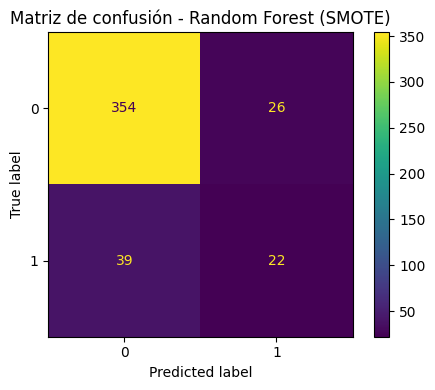

{'AUPR': 0.42624096068102846,
 'F1': 0.4036697247706422,
 'Precision': 0.4583333333333333,
 'Recall': 0.36065573770491804,
 'confusion_matrix': array([[354,  26],
        [ 39,  22]])}

In [42]:
# Random Forest con SMOTE (Pipeline imblearn: SMOTE solo en train)
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV, cross_val_predict
from sklearn.base import clone

# Ajustar smote_kwargs: eliminar n_jobs, que no es un argumento válido para SMOTE (imblearn)
smote_kwargs_fixed = dict(
    random_state=42,
    k_neighbors=3,
    sampling_strategy=0.6,
)

pipeline_smote_rf = ImbPipeline([
    ("smote", SMOTE(**smote_kwargs_fixed)),
    ("clf", RandomForestClassifier(class_weight="balanced", random_state=42)),
])

param_dist_rf_smote = {
    "clf__n_estimators": [50, 100, 200, 300],
    "clf__max_depth": [5, 10, 15, 20, None],
    "clf__min_samples_split": [2, 5, 10],
    "clf__min_samples_leaf": [1, 2, 5],
    "clf__max_features": ["sqrt", "log2", None],
}

busqueda_smote_rf = RandomizedSearchCV(
    pipeline_smote_rf,
    param_distributions=param_dist_rf_smote,
    n_iter=N_ITER_SMOTE,
    cv=CV_SMOTE,
    scoring="average_precision",
    random_state=42,
    refit=True,
)
busqueda_smote_rf.fit(train_x_t, train_y)
pipeline_smote_rf = busqueda_smote_rf.best_estimator_

# Umbral con OOF (cv=3 coherente con la búsqueda; en cada fold solo el train del fold se balancea)
oof_proba_smote_rf = cross_val_predict(
    clone(pipeline_smote_rf), train_x_t, train_y, cv=CV_SMOTE, method="predict_proba"
)[:, 1]
best_umbral_smote_rf, _ = optimizar_umbral(train_y, oof_proba_smote_rf)

# Evaluación en test (test no se toca con SMOTE)
pred_smote_rf = pipeline_smote_rf.predict_proba(test_x_t)[:, 1]
print(f"Mejores parámetros (Random Forest SMOTE): {busqueda_smote_rf.best_params_}")
print(f"Umbral óptimo (F1): {best_umbral_smote_rf:.3f}")
evaluar_clasificador(test_y, pred_smote_rf, "Random Forest (SMOTE)", umbral=best_umbral_smote_rf)

In [45]:
# Comparación: modelos sin SMOTE vs con SMOTE (AUPR, F1, Precision, Recall)
from sklearn.metrics import average_precision_score, f1_score, precision_score, recall_score

def _metricas(y_true, y_proba, umbral):
    y_pred = (y_proba >= umbral).astype(int)
    return {
        "AUPR": average_precision_score(y_true, y_proba),
        "F1": f1_score(y_true, y_pred, zero_division=0),
        "Precision": precision_score(y_true, y_pred, zero_division=0),
        "Recall": recall_score(y_true, y_pred, zero_division=0),
    }

test_y_arr = np.asarray(test_y)
filas = []

# Verifica y asigna probabilidades y umbrales de cada modelo "sin SMOTE"
try:
    pred_rf
    best_umbral_rf
except NameError:
    pred_rf = None
    best_umbral_rf = None
try:
    pred_xgb
    best_umbral_xgb
except NameError:
    pred_xgb = None
    best_umbral_xgb = None
try:
    pred_lgb
    best_umbral_lgb
except NameError:
    pred_lgb = None
    best_umbral_lgb = None

# Recolecta resultados solo si cada variable está definida
modelos_sin_smote = [
    ("Random Forest", pred_rf, best_umbral_rf),
    ("XGBoost", pred_xgb, best_umbral_xgb),
    ("LightGBM", pred_lgb, best_umbral_lgb),
]
for nombre, proba, umbral in modelos_sin_smote:
    if proba is not None and umbral is not None:
        m = _metricas(test_y_arr, proba, umbral)
        filas.append({"Modelo": nombre, "AUPR_sin_SMOTE": m["AUPR"], "F1_sin": m["F1"], "Precision_sin": m["Precision"], "Recall_sin": m["Recall"]})

# Repite para los modelos con SMOTE, si están definidos
try:
    pred_smote_rf
    best_umbral_smote_rf
except NameError:
    pred_smote_rf = None
    best_umbral_smote_rf = None
try:
    pred_smote_xgb
    best_umbral_smote_xgb
except NameError:
    pred_smote_xgb = None
    best_umbral_smote_xgb = None
try:
    pred_smote_lgb
    best_umbral_smote_lgb
except NameError:
    pred_smote_lgb = None
    best_umbral_smote_lgb = None

modelos_con_smote = [
    ("Random Forest", pred_smote_rf, best_umbral_smote_rf),
    ("XGBoost", pred_smote_xgb, best_umbral_smote_xgb),
    ("LightGBM", pred_smote_lgb, best_umbral_smote_lgb),
]
for nombre, proba, umbral in modelos_con_smote:
    if proba is not None and umbral is not None:
        m = _metricas(test_y_arr, proba, umbral)
        filas.append({"Modelo": nombre + " (SMOTE)", "AUPR_con_SMOTE": m["AUPR"], "F1_con": m["F1"], "Precision_con": m["Precision"], "Recall_con": m["Recall"]})

# Armado seguro del dataframe comparativo
df_sin = pd.DataFrame(filas[:3]).set_index("Modelo") if len(filas) >= 3 else pd.DataFrame().set_index(pd.Index([]))
df_con = pd.DataFrame(filas[3:]).set_index("Modelo") if len(filas) >= 6 else pd.DataFrame().set_index(pd.Index([]))

# La idea es siempre mostrar la comparación entre los modelos definidos
comparativo = pd.DataFrame()
if not df_sin.empty and not df_con.empty:
    comparativo = pd.DataFrame({
        "AUPR_sin_SMOTE": df_sin.get("AUPR_sin_SMOTE"),
        "AUPR_con_SMOTE": df_con.get("AUPR_con_SMOTE"),
        "F1_sin": df_sin.get("F1_sin"),
        "F1_con": df_con.get("F1_con"),
        "Precision_sin": df_sin.get("Precision_sin"),
        "Precision_con": df_con.get("Precision_con"),
        "Recall_sin": df_sin.get("Recall_sin"),
        "Recall_con": df_con.get("Recall_con"),
    }, index=df_sin.index)
    comparativo.index = ["Random Forest", "XGBoost", "LightGBM"][:len(comparativo.index)]
elif not df_sin.empty:
    comparativo = df_sin
elif not df_con.empty:
    comparativo = df_con

comparativo

,AUPR_con_SMOTE,F1_con,Precision_con,Recall_con
Modelo,,,,
Random Forest (SMOTE),0.426241,0.403670,0.458333,0.360656
XGBoost (SMOTE),0.420171,0.437086,0.366667,0.540984
LightGBM (SMOTE),0.411789,0.410526,0.302326,0.639344


### INTERPRETACIÓN

Como XGBoost es un ensemble de árboles la interpretación se hace por **importancia de variable**

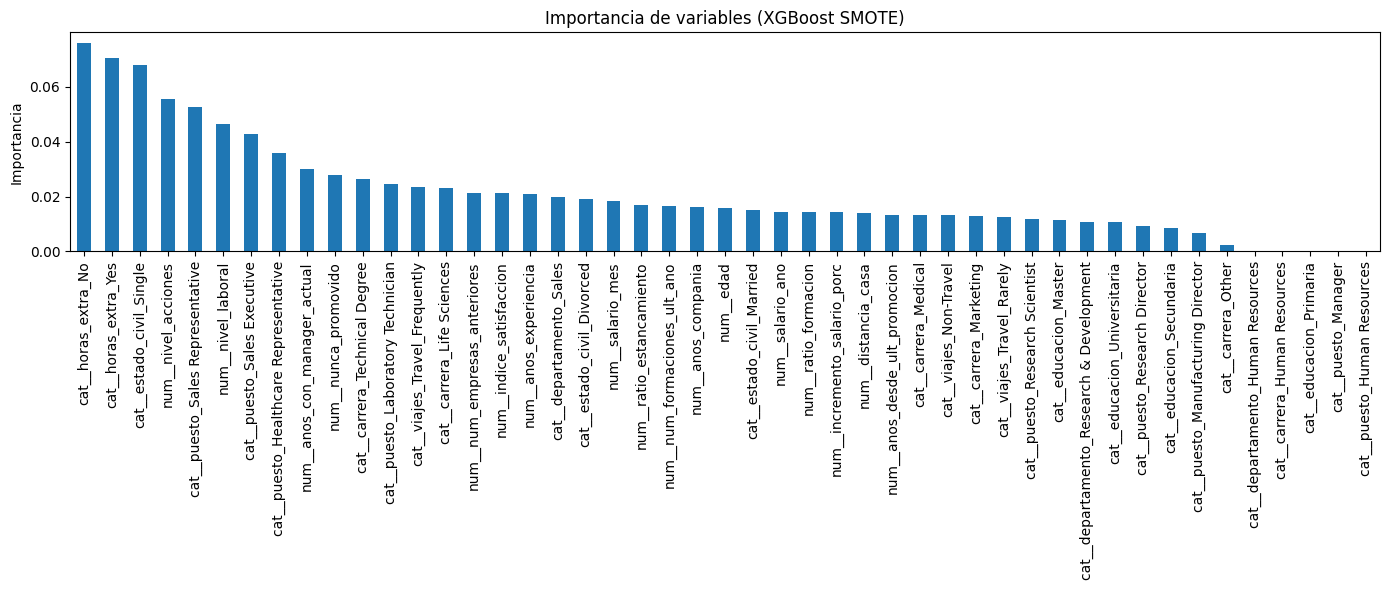

In [ ]:
clf = pipeline_smote_xgb.named_steps["clf"]   # o pipeline_smote_xgb[-1]
importances = clf.feature_importances_
# Nombres en el espacio transformado (preprocessor)
pd.Series(importances, index=feature_names).sort_values(ascending=False).plot(
    kind="bar", figsize=(14, 6)
)
plt.title("Importancia de variables (XGBoost SMOTE)")
plt.ylabel("Importancia")
plt.tight_layout()
plt.show()

### EXPLOTACIÓN

Incoporación del scoring al dataframe principal

In [47]:
# Mismas features que en entrenamiento, transformadas por el preprocessor
X_full = df[num_cols + cat_cols].copy()
X_full_t = preprocessor.transform(X_full)
df['scoring_abandono'] = pipeline_smote_xgb.predict_proba(X_full_t)[:, 1]
df

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,satisfaccion_entorno,implicacion,nivel_laboral,...,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual,salario_ano,impacto_abandono,ratio_estancamiento,indice_satisfaccion,nunca_promovido,ratio_formacion,scoring_abandono
id,,,,,,,,,,,,,,,,,,,,,
1,41,1,Travel_Rarely,Sales,1,Universitaria,Life Sciences,Media,Alta,2,...,6,0,5,71916,14670.864,0.000000,2.4,0,0.000000,0.895950
2,49,0,Travel_Frequently,Research & Development,8,Secundaria,Life Sciences,Alta,Media,2,...,10,1,7,61560,12558.240,0.090909,3.0,0,0.272727,0.090862
4,37,1,Travel_Rarely,Research & Development,2,Secundaria,Other,Muy_Alta,Media,1,...,0,0,0,25080,4037.880,0.000000,2.6,1,3.000000,0.970418
5,33,0,Travel_Frequently,Research & Development,3,Universitaria,Life Sciences,Muy_Alta,Alta,1,...,8,3,0,34908,6876.876,0.333333,3.2,0,0.333333,0.393625
7,27,0,Travel_Rarely,Research & Development,2,Universitaria,Medical,Baja,Alta,1,...,2,2,2,41616,8198.352,0.666667,2.8,1,1.000000,0.254347
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,0,Travel_Frequently,Research & Development,23,Master,Medical,Alta,Muy_Alta,2,...,5,0,3,30852,6077.844,0.000000,3.4,0,0.500000,0.130170
2062,39,0,Travel_Rarely,Research & Development,6,Secundaria,Medical,Muy_Alta,Media,3,...,7,1,7,119892,25177.320,0.125000,2.4,0,0.625000,0.118690
2064,27,0,Travel_Rarely,Research & Development,4,Master,Life Sciences,Media,Muy_Alta,2,...,6,0,3,73704,15035.616,0.000000,3.2,0,0.000000,0.086019


Ejemplo de los 10 empleados con mayor probabilidad de dejar la empresa

In [48]:
df.sort_values(by = 'scoring_abandono', ascending = False)[0:10]

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,satisfaccion_entorno,implicacion,nivel_laboral,...,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual,salario_ano,impacto_abandono,ratio_estancamiento,indice_satisfaccion,nunca_promovido,ratio_formacion,scoring_abandono
id,,,,,,,,,,,,,,,,,,,,,
622,26,1,Travel_Rarely,Research & Development,24,Primaria,Technical Degree,Alta,Baja,1,...,1,0,0,28080,4520.880,0.000,2.0,0,1.5,0.988544
1273,25,1,Travel_Frequently,Sales,24,Primaria,Life Sciences,Alta,Baja,1,...,1,1,0,13416,2159.976,0.500,2.4,1,2.0,0.985154
959,19,1,Travel_Rarely,Sales,21,Secundaria,Other,Muy_Alta,Media,1,...,1,0,0,25452,4097.772,0.000,2.6,0,1.5,0.982501
167,19,1,Travel_Rarely,Sales,22,Universitaria,Marketing,Muy_Alta,Alta,1,...,0,0,0,20100,3236.100,0.000,3.4,1,2.0,0.978929
19,28,1,Travel_Rarely,Research & Development,24,Secundaria,Life Sciences,Alta,Media,1,...,4,0,3,24336,3918.096,0.000,2.4,0,0.8,0.976836
614,18,1,Travel_Frequently,Sales,5,Universitaria,Marketing,Media,Alta,1,...,0,0,0,22536,3628.296,0.000,3.0,1,3.0,0.973877
741,28,1,Travel_Rarely,Research & Development,1,Primaria,Life Sciences,Baja,Baja,1,...,7,3,7,26592,4281.312,0.375,2.4,0,0.5,0.973143
1248,19,1,Non-Travel,Research & Development,10,Secundaria,Medical,Baja,Media,1,...,1,0,0,22308,3591.588,0.000,2.2,0,1.0,0.971133
4,37,1,Travel_Rarely,Research & Development,2,Secundaria,Other,Muy_Alta,Media,1,...,0,0,0,25080,4037.880,0.000,2.6,1,3.0,0.970418


Ejemplo: riesgo de dejar la empresa por puesto de trabajo

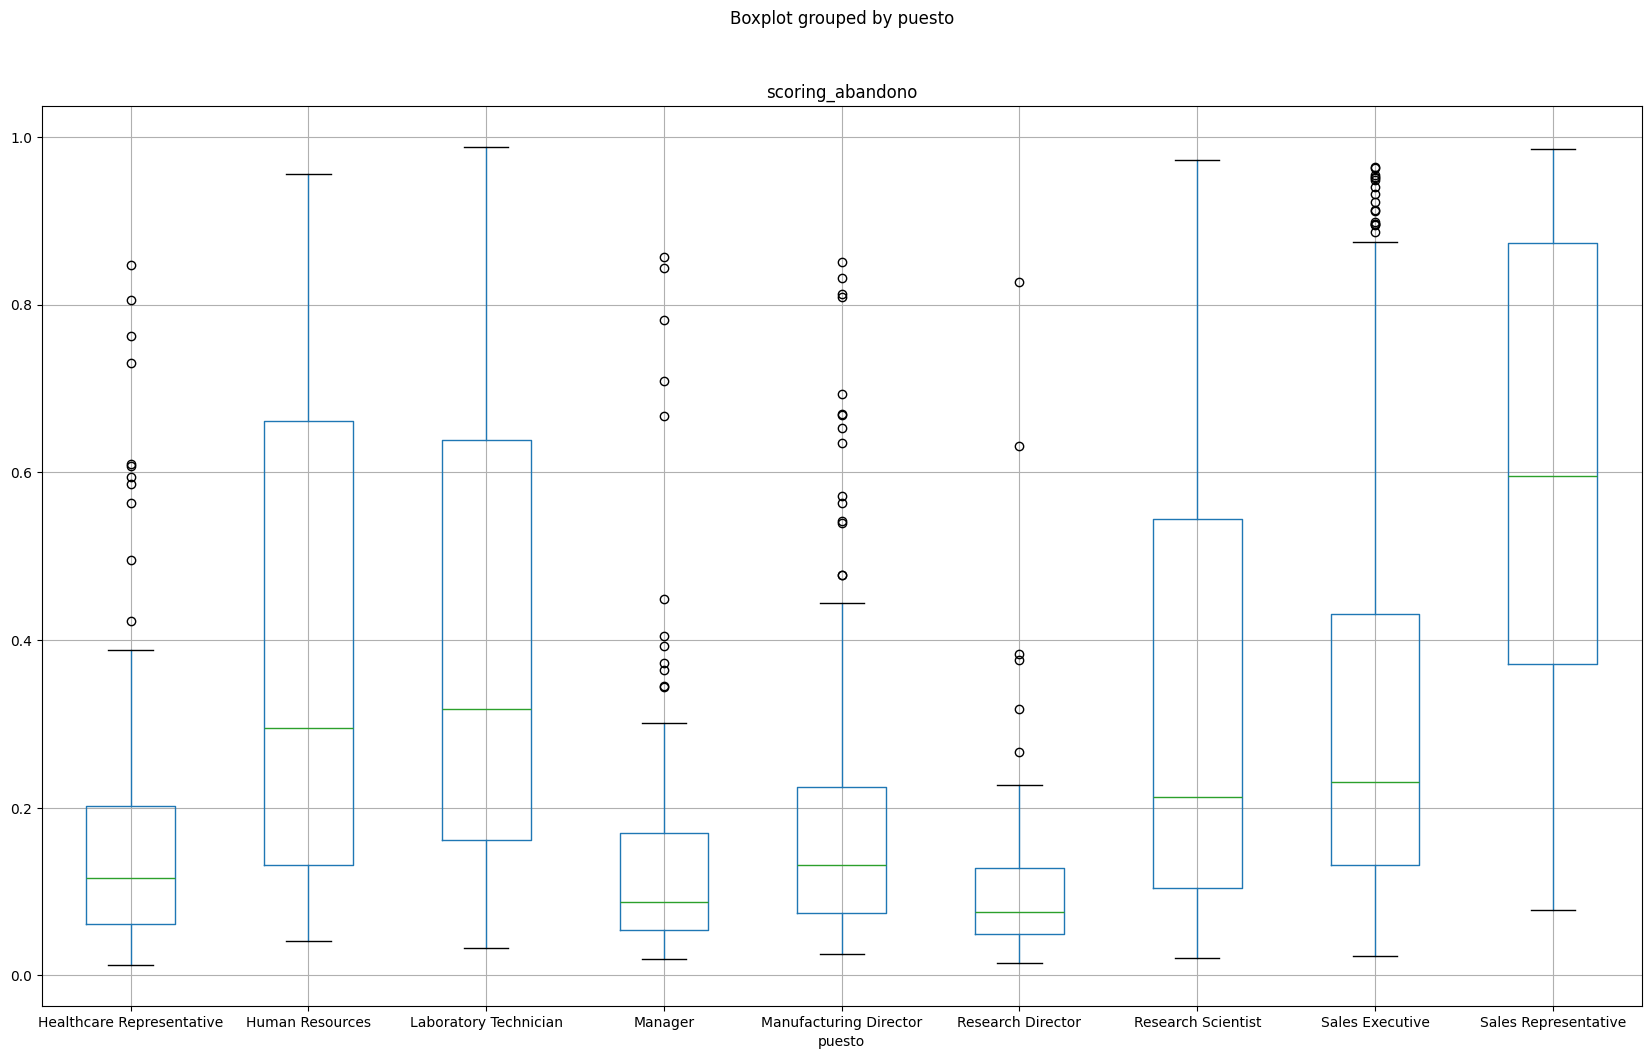

In [49]:
df.boxplot(column='scoring_abandono', by='puesto', figsize = (20,12));

### GUARDAR EL RESULTADO

In [50]:
df

,edad,abandono,viajes,departamento,distancia_casa,educacion,carrera,satisfaccion_entorno,implicacion,nivel_laboral,...,anos_compania,anos_desde_ult_promocion,anos_con_manager_actual,salario_ano,impacto_abandono,ratio_estancamiento,indice_satisfaccion,nunca_promovido,ratio_formacion,scoring_abandono
id,,,,,,,,,,,,,,,,,,,,,
1,41,1,Travel_Rarely,Sales,1,Universitaria,Life Sciences,Media,Alta,2,...,6,0,5,71916,14670.864,0.000000,2.4,0,0.000000,0.895950
2,49,0,Travel_Frequently,Research & Development,8,Secundaria,Life Sciences,Alta,Media,2,...,10,1,7,61560,12558.240,0.090909,3.0,0,0.272727,0.090862
4,37,1,Travel_Rarely,Research & Development,2,Secundaria,Other,Muy_Alta,Media,1,...,0,0,0,25080,4037.880,0.000000,2.6,1,3.000000,0.970418
5,33,0,Travel_Frequently,Research & Development,3,Universitaria,Life Sciences,Muy_Alta,Alta,1,...,8,3,0,34908,6876.876,0.333333,3.2,0,0.333333,0.393625
7,27,0,Travel_Rarely,Research & Development,2,Universitaria,Medical,Baja,Alta,1,...,2,2,2,41616,8198.352,0.666667,2.8,1,1.000000,0.254347
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2061,36,0,Travel_Frequently,Research & Development,23,Master,Medical,Alta,Muy_Alta,2,...,5,0,3,30852,6077.844,0.000000,3.4,0,0.500000,0.130170
2062,39,0,Travel_Rarely,Research & Development,6,Secundaria,Medical,Muy_Alta,Media,3,...,7,1,7,119892,25177.320,0.125000,2.4,0,0.625000,0.118690
2064,27,0,Travel_Rarely,Research & Development,4,Master,Life Sciences,Media,Muy_Alta,2,...,6,0,3,73704,15035.616,0.000000,3.2,0,0.000000,0.086019


In [51]:
import joblib

# Guardar el df con scoring
joblib.dump(df, "artifacts/modeling/df_con_scoring.pkl")

['artifacts/modeling/df_con_scoring.pkl']

In [ ]:
from google.colab import files

df.to_excel('abandono_con_scoring.xlsx') 
files.download('abandono_con_scoring.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>